# Dataset link -
##### https://data.mendeley.com/datasets/748f8jkphb/3

# Testing if GPU active

In [1]:
import tensorflow as tf

In [2]:
tf.keras.backend.clear_session()

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    for gpu in gpus:
        tf.config.experimental.set_virtual_device_configuration(
            gpu,
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)]
        )
else:
    print("No GPUs available.")

In [5]:
! nvidia-smi

Fri Feb  2 02:24:39 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0             27W /  130W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Image Augmentation for Balancing Data

In [6]:
import os
import shutil
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array, array_to_img
from tqdm import tqdm

In [7]:
input_data_dir = '../Dataset/Plants'
output_data_dir = '../Dataset/Plants'
target_num_images = 250

In [8]:
os.listdir(input_data_dir)

['Aloevera',
 'Amla',
 'Amruta_Balli',
 'Arali',
 'Ashoka',
 'Ashwagandha',
 'Avacado',
 'Bamboo',
 'Basale',
 'Betel',
 'Betel_Nut',
 'Brahmi',
 'Castor',
 'Curry_Leaf',
 'Doddapatre',
 'Ekka',
 'Ganike',
 'Gauva',
 'Geranium',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jasmine',
 'Lemon',
 'Lemon_grass',
 'Mango',
 'Mint',
 'Nagadali',
 'Neem',
 'Nithyapushpa',
 'Nooni',
 'Pappaya',
 'Pepper',
 'Pomegranate',
 'Raktachandini',
 'Rose',
 'Sapota',
 'Tulasi',
 'Wood_sorel']

In [9]:
def augment_and_save_images(class_folder, image_names):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    output_class_path = os.path.join(output_data_dir, class_folder)
    os.makedirs(output_class_path, exist_ok=True)

    num_images_to_generate = target_num_images - len(image_names)

    if num_images_to_generate > 0:
        for i in tqdm(range(num_images_to_generate), desc=f'Augmenting {class_folder}'):
            random_image_name = random.choice(image_names)
            image_path = os.path.join(input_data_dir, class_folder, random_image_name)

            img = load_img(image_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            for batch in datagen.flow(x, batch_size=1):
                augmented_img = array_to_img(batch[0])
                augmented_image_name = f"augmented_{random.randint(1, 100000)}.jpg"
                output_path = os.path.join(output_class_path, augmented_image_name)
                augmented_img.save(output_path)
                break

In [10]:
for class_folder in os.listdir(input_data_dir):
    class_path = os.path.join(input_data_dir, class_folder)
    existing_images = [image_name for image_name in os.listdir(class_path) if image_name.endswith('.jpg')]
    augment_and_save_images(class_folder, existing_images)

In [11]:
import matplotlib.pyplot as plt

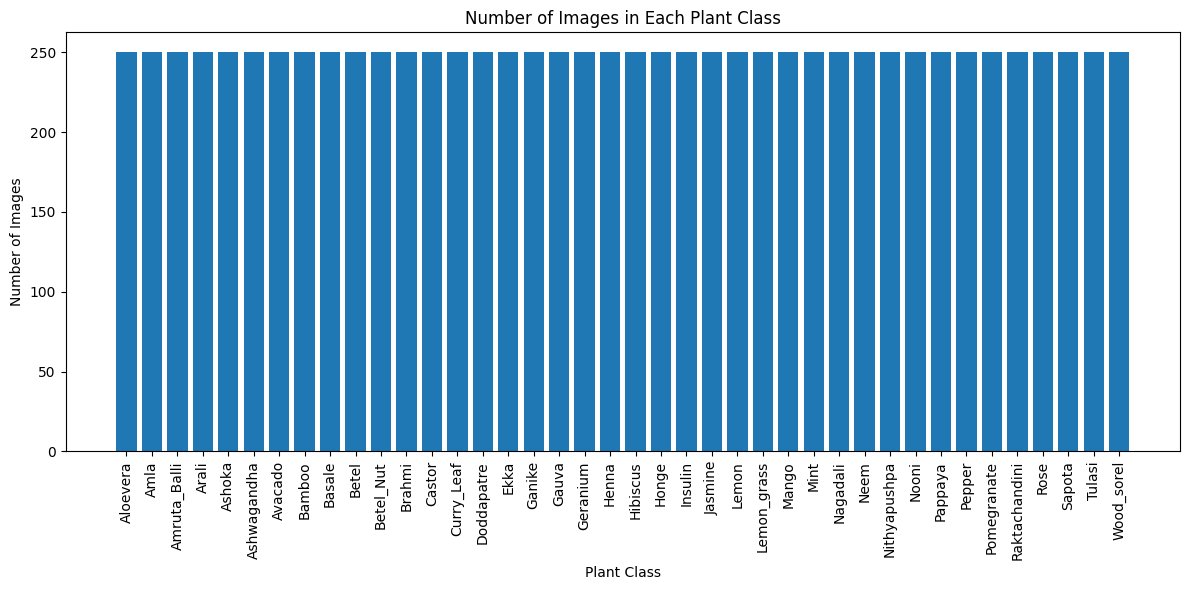

In [12]:
root_directory = '../Dataset/Plants'

class_names = []
image_counts = []

for class_folder in os.listdir(root_directory):
    class_path = os.path.join(root_directory, class_folder)
    if os.path.isdir(class_path):
        class_names.append(class_folder)
        image_counts.append(len(os.listdir(class_path)))


plt.figure(figsize=(12, 6))
plt.bar(class_names, image_counts)
plt.xlabel('Plant Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Plant Class')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Splitting to Test and Train data

In [13]:
output_directory_test_train = '../Dataset/'
os.makedirs(os.path.join(output_directory_test_train, 'Train'), exist_ok=True)
os.makedirs(os.path.join(output_directory_test_train, 'Test'), exist_ok=True)

In [14]:
os.listdir(output_directory_test_train)
train_ratio = 0.8

In [15]:
for class_folder in os.listdir(input_data_dir):
    class_path = os.path.join(input_data_dir, class_folder)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        num_images = len(image_files)
        num_train = int(train_ratio * num_images)

        train_class_dir = os.path.join(output_directory_test_train, 'Train', class_folder)
        test_class_dir = os.path.join(output_directory_test_train, 'Test', class_folder)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        for i, image_file in enumerate(tqdm(image_files, desc=f'Copying {class_folder}')):
            source_path = os.path.join(class_path, image_file)
            if i < num_train:
                destination_path = os.path.join(train_class_dir, image_file)
            else:
                destination_path = os.path.join(test_class_dir, image_file)
            shutil.copyfile(source_path, destination_path)

Copying Wood_sorel: 100%|██████████| 250/250 [00:01<00:00, 148.81it/s]


# Checking, Resizing, Vectorizing Images

In [16]:
import numpy as np
from sklearn.utils import shuffle
import cv2

In [17]:
dataset_directory = '../Dataset/Plants/'

In [18]:
image_class_name = [image_class for image_class in os.listdir(dataset_directory)]
image_class_name_label = {image_class:index for index, image_class in enumerate(image_class_name)}
total_class = len(image_class_name)
IMAGE_SIZE = (160,160)

In [19]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

In [20]:
def load_data():
    
    datasets = ['../Dataset/Train/', '../Dataset/Test/']
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print(f"Loading {dataset}")
        
        for folder in os.listdir(dataset):
            label = image_class_name_label[folder]
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = pre_process(img_path) 
                
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [21]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../Dataset/Train/


100%|██████████| 200/200 [00:01<00:00, 114.50it/s]


Loading ../Dataset/Test/


100%|██████████| 50/50 [00:00<00:00, 123.99it/s]


In [22]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [23]:
number_train = train_labels.shape[0]
number_test = test_labels.shape[0]

print (f"Number of training examples: {number_train}")
print (f"Number of testing examples: {number_test}")
print (f"Each image is of size: {IMAGE_SIZE}")

Number of training examples: 8000
Number of testing examples: 2001
Each image is of size: (160, 160)


In [24]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Displaying Sample Images

In [25]:
def display_examples(image_class_name, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(image_class_name[labels[i]])
    plt.show()

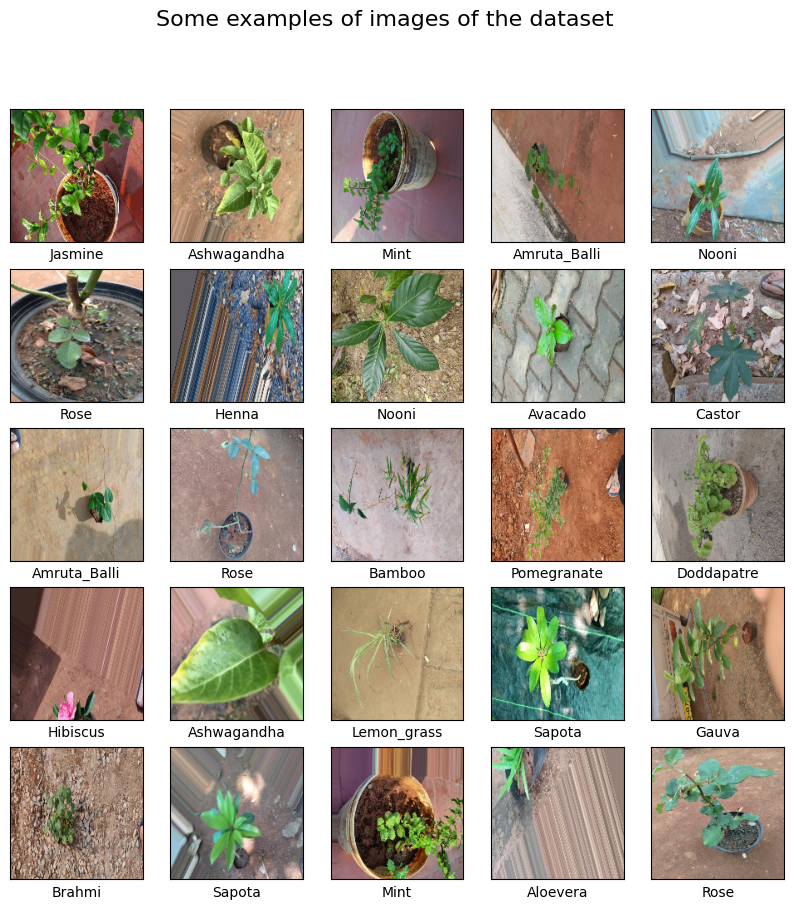

In [26]:
display_examples(image_class_name, train_images, train_labels)

# Model Import and Configuration

In [27]:
from keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160,160,3))

In [28]:
from keras import layers

# for layer in base_model.layers:
#     layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  
    layers.Dense(256, activation='relu'),  
    layers.Dropout(0.5),
    layers.Dense(40, activation='softmax')
])

In [29]:
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    initial_lr = 0.001  
    if epoch < 10:
        return initial_lr
    elif epoch < 20:
        return initial_lr * 0.1  
    else:
        return initial_lr * 0.01  

In [30]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [31]:
from keras.optimizers import gradient_descent_v2
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=gradient_descent_v2.SGD(learning_rate=0.001),  
              metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 40)                10280     
                                                                 
Total params: 2,596,200
Trainable params: 2,562,088
Non-

In [33]:
from keras.utils import to_categorical

train_labels_encoded = to_categorical(train_labels, num_classes=40)
test_labels_encoded = to_categorical(test_labels, num_classes=40)

In [40]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



# from keras.callbacks import ReduceLROnPlateau

# rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

In [35]:
history = model.fit(train_images, train_labels, epochs=35, batch_size=8, validation_split=0.2, callbacks=[early_stopping, lr_scheduler]) 

Epoch 1/35
800/800 [==============================] - 35s 28ms/step - loss: 3.4247 - accuracy: 0.1312 - val_loss: 2.7142 - val_accuracy: 0.3425 - lr: 0.0010
Epoch 2/35
800/800 [==============================] - 21s 26ms/step - loss: 2.2790 - accuracy: 0.4105 - val_loss: 1.4267 - val_accuracy: 0.6762 - lr: 0.0010
Epoch 3/35
800/800 [==============================] - 21s 26ms/step - loss: 1.5765 - accuracy: 0.5864 - val_loss: 0.8238 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 4/35
800/800 [==============================] - 21s 26ms/step - loss: 1.1164 - accuracy: 0.7034 - val_loss: 0.5019 - val_accuracy: 0.8831 - lr: 0.0010
Epoch 5/35
800/800 [==============================] - 21s 26ms/step - loss: 0.8701 - accuracy: 0.7658 - val_loss: 0.3519 - val_accuracy: 0.9194 - lr: 0.0010
Epoch 6/35
800/800 [==============================] - 21s 26ms/step - loss: 0.6786 - accuracy: 0.8155 - val_loss: 0.2751 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 7/35
800/800 [==============================] - 21s 

# Accuracy Metrics

In [36]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

63/63 [==============================] - 2s 17ms/step - loss: 0.1931 - accuracy: 0.9460
Test accuracy: 0.9460269808769226


In [37]:
model.save('../Model_Weights/Herbal-AI-Classification.h5')
model.save_weights('../Model_Weights/Herbal-AI-Classification-Weights.h5')

Custom Layers

63/63 [==============================] - 2s 15ms/step


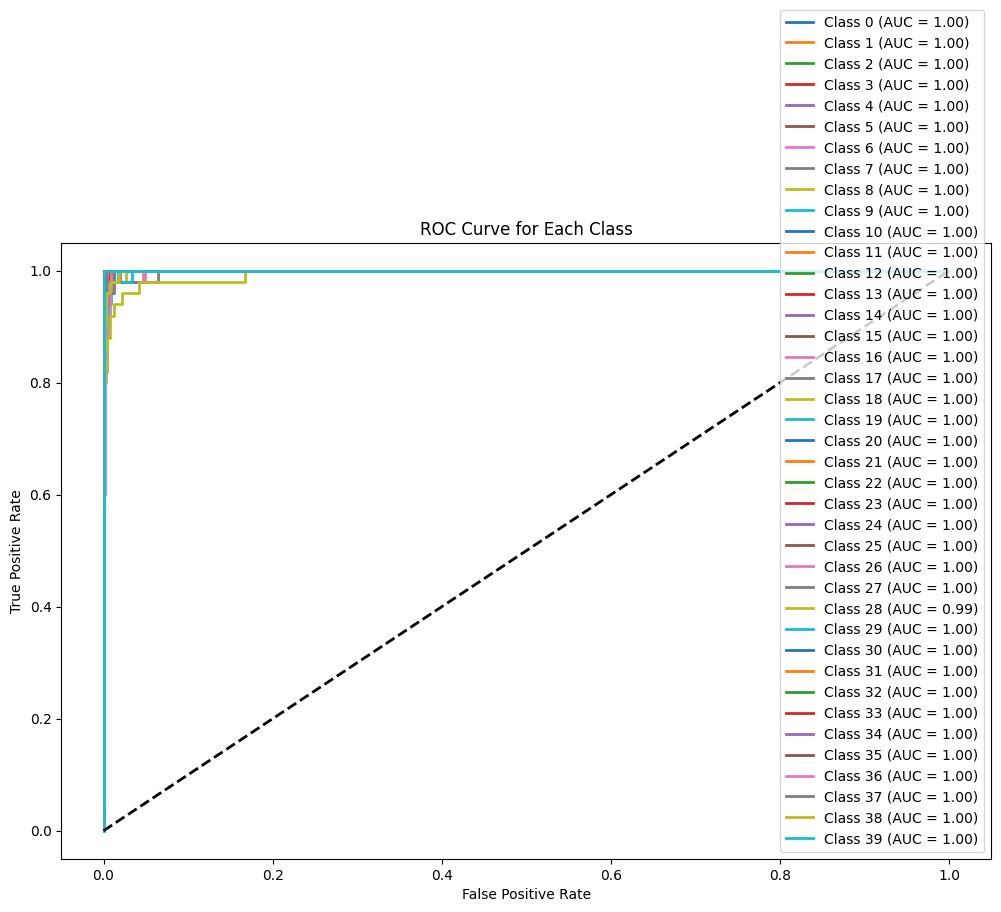

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

test_predictions_probs = model.predict(test_images)
true_labels_bin = label_binarize(test_labels, classes=list(range(40)))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(40):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], test_predictions_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(12, 8))
for i in range(40):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


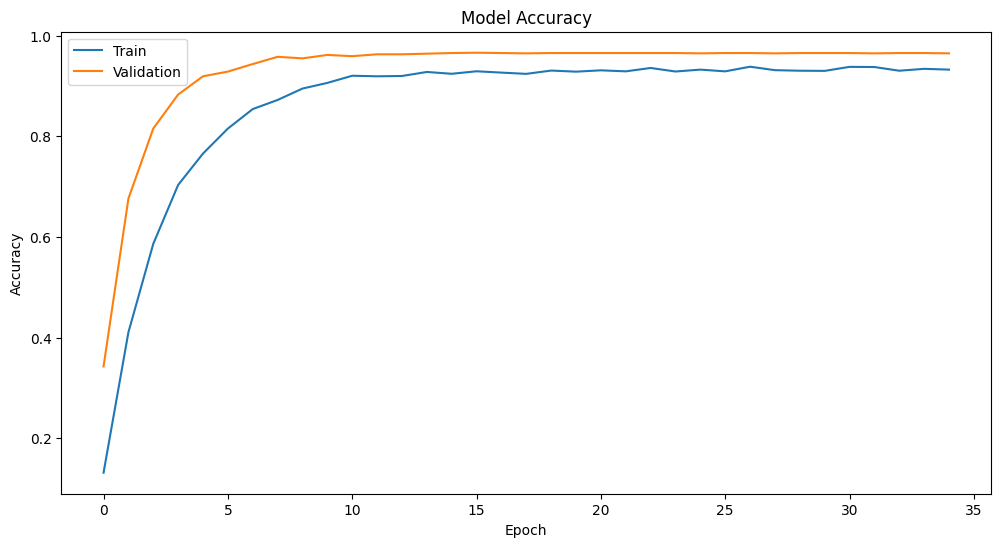

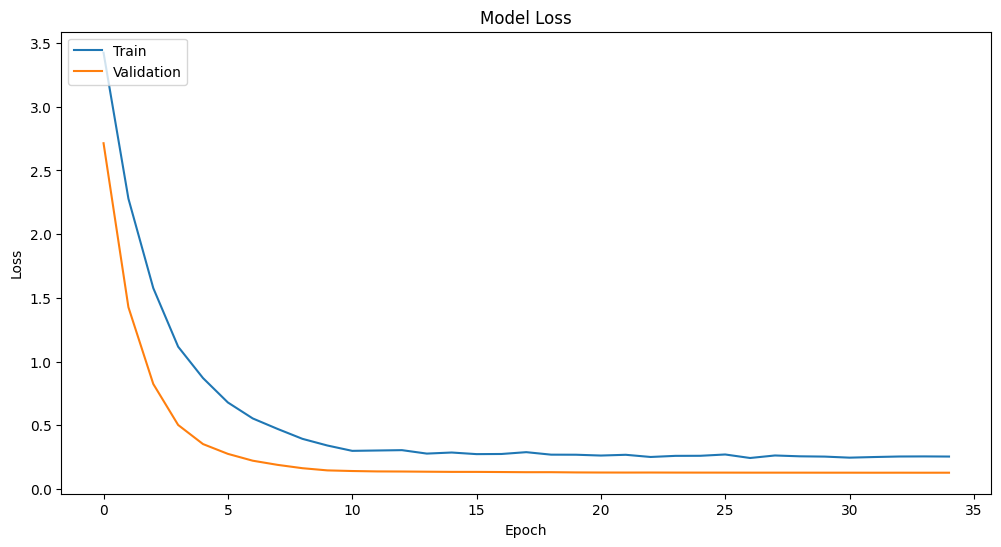

In [39]:

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
